**import necessary libraries**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

from skimage.io import imread #skimage library for reading the image
from skimage.transform import resize

**Load the image**

In [ ]:
data=[]#input array
target=[]#output array
category=['female','male']
dir='/content/drive/MyDrive/study/gender-prediction-image-classification'##path which contains all the categories of images

for i in category:
  print('loading... category  :',i)
  path=os.path.join(dir,i)
  img=os.listdir(path)
  for j in img:
    img_path=os.path.join(path,j)
    img_array=imread(img_path)
    img_resize=resize(img_array,(100,100,3))
    data.append(img_resize.flatten())
    target.append(category.index(i))
  print('loaded category:',i ,'successfully')


loading... category  : female
loaded category: female successfully
loading... category  : male
loaded category: male successfully


**Separate input features and targets**

In [ ]:
X=np.array(data)
X

array([[1.26555490e-01, 1.14790784e-01, 8.73398039e-02, ...,
        3.40248431e-01, 1.55549118e-01, 9.13529412e-02],
       [3.57821176e-01, 2.87852745e-01, 2.41954608e-01, ...,
        5.00784314e-02, 4.33644118e-02, 4.66819608e-02],
       [1.90268824e-01, 1.62214608e-01, 1.01327647e-01, ...,
        5.52161471e-01, 3.91838529e-01, 1.47215686e-01],
       ...,
       [6.88443137e-01, 5.11678431e-01, 3.89521569e-01, ...,
        2.00588235e-02, 5.14313725e-02, 5.92745098e-02],
       [3.09019608e-02, 2.69803922e-02, 1.91372549e-02, ...,
        3.81960784e-02, 2.48627451e-02, 4.78431373e-04],
       [8.63509804e-01, 6.39980392e-01, 5.61549020e-01, ...,
        5.88549020e-01, 3.41941176e-01, 2.76176471e-01]])

In [ ]:
y=np.array(target)
y

array([0, 0, 0, ..., 1, 1, 1])

***Splitting the data into training and testing sets ***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape

((8159, 30000), (3497, 30000))

In [ ]:
y_train.shape,y_test.shape

((8159,), (3497,))

**Build and train the model**

In [ ]:
s=SVC(random_state=1)
s.fit(X_train,y_train)

SVC(random_state=1)

In [ ]:
y_pred=s.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


***performance measure ***

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1821
           1       0.91      0.92      0.92      1676

    accuracy                           0.92      3497
   macro avg       0.92      0.92      0.92      3497
weighted avg       0.92      0.92      0.92      3497



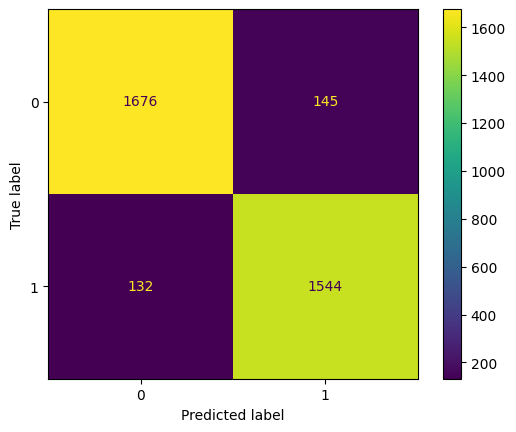

In [ ]:
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**Prediction**

Female



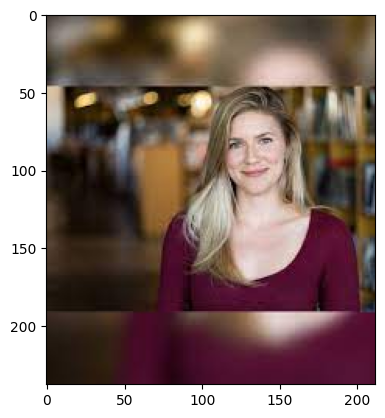

In [ ]:
new='/content/drive/MyDrive/study/gender-prediction-image-classification/download2.jpeg'
img_new=imread(new)
img_new1=resize(img_new,(100,100,3)).flatten().reshape(1,-1)
y_new=s.predict(img_new1)
if y_new==1:
  print('Male')
else:
  print('Female')
print()
plt.imshow(img_new)
plt.show()




Male



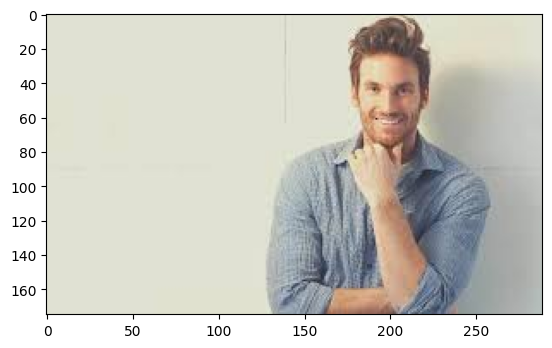

In [ ]:
new='/content/drive/MyDrive/study/gender-prediction-image-classification/download1.jpeg'
img_new=imread(new)
img_new1=resize(img_new,(100,100,3)).flatten().reshape(1,-1)
y_new=s.predict(img_new1)
if y_new==1:
  print('Male')
else:
  print('Female')
print()
plt.imshow(img_new)
plt.show()